2. Problem Statement

I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for eachwoman.

Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study
is available in a 1978 paper from the Journal of Political Economy.

Description of Variables

The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)

age: woman's age

yrs_married: number of years married

children: number of children

religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 =college graduate, 17 = some graduate school, 20 = advanced degree)
occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 =
"white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)

occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
dta = sm.datasets.fair.load_pandas().data

C:\Users\Rams\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")

X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [5]:
dta.shape

(6366, 10)

In [6]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [7]:
X.shape

(6366, 17)

In [9]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [10]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [12]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006E9F874BE0>,
      dtype=object)

<Figure size 1440x1296 with 0 Axes>

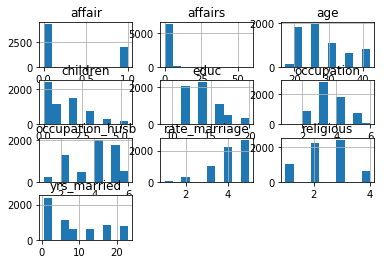

In [13]:
%matplotlib inline
plt.figure(figsize= (20,18))
dta.hist()

In [16]:
#Split the data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test= train_test_split(X,y, test_size = 0.3 , random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4456, 17)
(1910, 17)
(4456,)
(1910,)


In [17]:
#using logistic regression model

logist = sm.Logit(y_train,X_train)

result = logist.fit()


Optimization terminated successfully.
         Current function value: 0.544479
         Iterations 6


In [18]:
#prediction by state  model

predictions = result.predict(X_test)
predictions

2764    0.653211
4481    0.087718
5360    0.273074
5802    0.249471
1220    0.249630
5812    0.166215
3719    0.160619
3848    0.202858
1865    0.760648
2535    0.310242
2505    0.104535
6273    0.186280
3710    0.075798
4229    0.300914
1262    0.736723
5321    0.593884
3790    0.296514
994     0.732196
5644    0.296810
2252    0.156072
1804    0.203707
861     0.448163
1601    0.089842
1718    0.471631
2976    0.168971
3603    0.161252
4130    0.396058
5824    0.361373
5901    0.252252
4408    0.087566
          ...   
5615    0.242151
1737    0.515613
2701    0.185493
4024    0.419446
1012    0.129569
3888    0.143331
4746    0.207049
5607    0.132057
1946    0.874461
3119    0.133824
156     0.604838
1752    0.653266
624     0.612704
4622    0.556290
1788    0.693977
500     0.264134
726     0.220550
4162    0.087718
48      0.158934
1691    0.572606
5882    0.152058
2244    0.395267
1985    0.841614
2853    0.223091
18      0.803795
3053    0.144139
1875    0.207506
5851    0.4376

In [19]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4456
Model:                          Logit   Df Residuals:                     4439
Method:                           MLE   Df Model:                           16
Date:                Wed, 03 Oct 2018   Pseudo R-squ.:                  0.1360
Time:                        19:00:06   Log-Likelihood:                -2426.2
converged:                       True   LL-Null:                       -2808.3
                                        LLR p-value:                2.844e-152
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4842      0.777      3.198      0.001       0.961       4.007
occ_2             0.9414      0.658      1.432      0.152      -0.347       2.230
occ_3             1.2324      0.652      1.890      0.059      -0.046       2.511
occ_4             0.9731      0.653      1.490      0.136      -0.307       2.254
occ_5             1.6017      0.657      2.436      0.015       0.313       2.890
occ_6             1.8242      0.707      2.581      0.010       0.439       3.209
occ_husb_2        0.0649      0.215      0.302      0.762      -0.356       0.486
occ_husb_3        0.1976      0.235      0.841      0.400      -0.263       0.658
occ_husb_4        0.0304      0.208      0.146      0.884      -0.377       0.438
occ_husb_5       -0.0052      0.210     -0.025      0.980      -0.417       0.406
occ_husb_6       -0.0183      0.236     -0.078      0.938      -0.481       0.445
rate_marriage    -0.7145      0.038    -18.929      0.000      -0.788      -0.640
age              -0.0577      0.012     -4.686      0.000      -0.082      -0.034
yrs_married       0.1081      0.013      8.243      0.000       0.082       0.134
children         -0.0126      0.038     -0.329      0.742      -0.088       0.062
religious        -0.3889      0.042     -9.342      0.000      -0.470      -0.307
educ              0.0046      0.021      0.224      0.823      -0.036       0.045
=================================================================================
"""